In [ ]:
import mglearn
from matplotlib import pyplot as plt
X, y =  mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"X.shape{X.shape}")

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys(): \n{cancer.keys()}")

In [ ]:
print(f"Shape of cancer data: {cancer.data.shape}")

In [ ]:
import numpy as np #np = numpy
print("Sammple counts per class: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

In [ ]:
print(f"Feature names: \n{cancer.feature_names}")

In [ ]:
print(f"cancer description \n {cancer.DESCR}")

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=10)

In [42]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f"Data shape: {boston.data.shape}")

Data shape: (506, 13)


In [43]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print(f"X.shape: {X.shape}")

X.shape: (506, 104)


In [7]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [36]:
# from sklearn.datasets import make_blobs
# X, y = mglearn.datasets.make_forge()

# X,y = make_blobs()

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [38]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


In [40]:
print(f"Test set accuracy: {clf.score(X_test,y_test)}")

Test set accuracy: 0.8571428571428571


In [2]:
import mglearn
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neigbors")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

NameError: name 'KNeighborsClassifier' is not defined

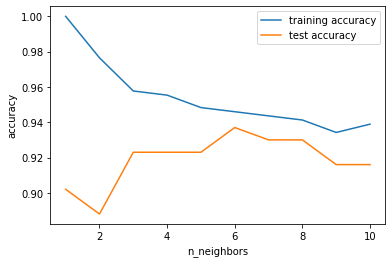

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

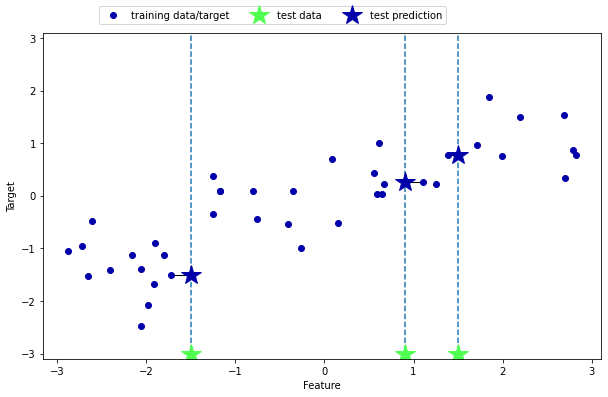

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

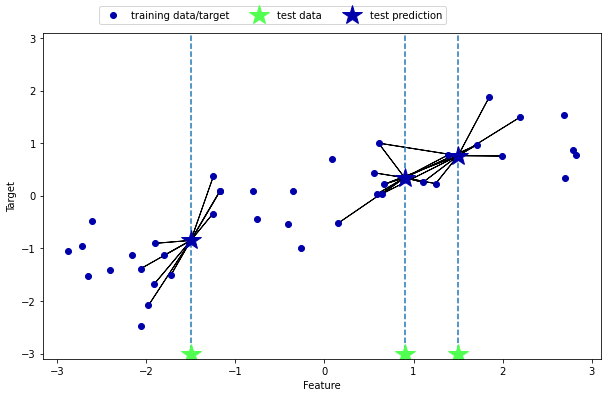

In [49]:
mglearn.plots.plot_knn_regression(n_neighbors=10)

In [8]:
import mglearn
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [9]:
print(f"Test set predictions: \n {reg.predict(X_test)}")

Test set predictions: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [10]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


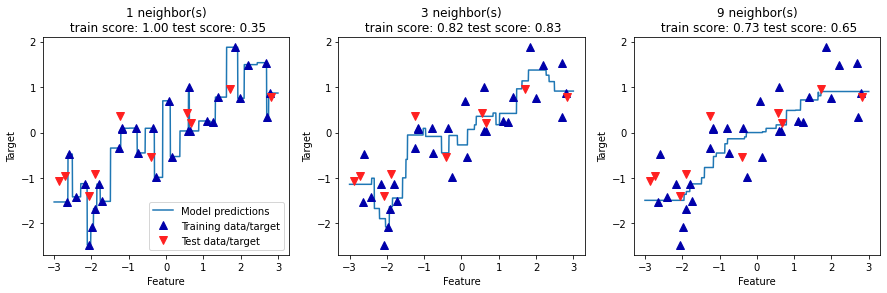

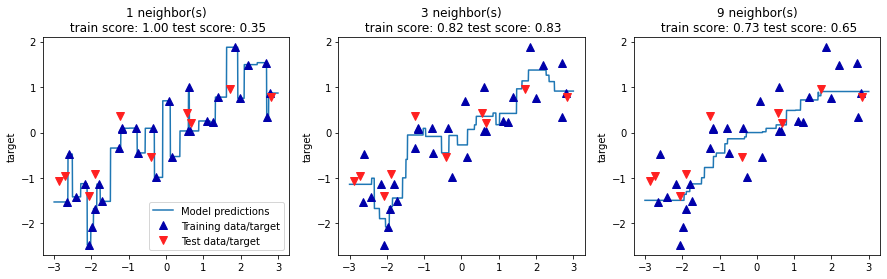

In [18]:
import numpy as np
fig, axes = plt.subplots(1, 3, figsize = (15,4))

line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_label("feature")
    ax.set_ylabel("target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
